## Data Analysis
This document details the exploratory data analysis (EDA) performed on the processed benthic dataset to understand the distribution and relationships of various features.

### Data Loading and Preparation
Importing libraries and loading the dataset. The processed dataset is loaded into a pandas DataFrame for analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../dataset/processed_benthic_data.csv')

---
### Mapping Disturbance Impact Scores to Labels
Numeric disturbance impact scores are replaced with descriptive labels, and rows with a score of 0 are removed to focus on relevant disturbances

In [2]:
# Create a dictionary to map disturbance impact scores to their labels
disturbance_dict = {1: 'Flood', 2: 'Disease', 3: 'Cyclone/Storm', 4: 'Crown of Thorns', 5: 'Multiple', 6: 'Unknown'}

# Replace the numeric disturbance impact scores with their labels
df['disturbance_impact_score'] = df['disturbance_impact_score'].replace(disturbance_dict)

# Remove rows with disturbance impact score of 0 (none)
df = df[df['disturbance_impact_score'] != 0]

---
### Plotting the Feature Distributions
Each column's distribution is plotted using either a count plot or a histogram with KDE, depending on whether the column is categorical or continuous.

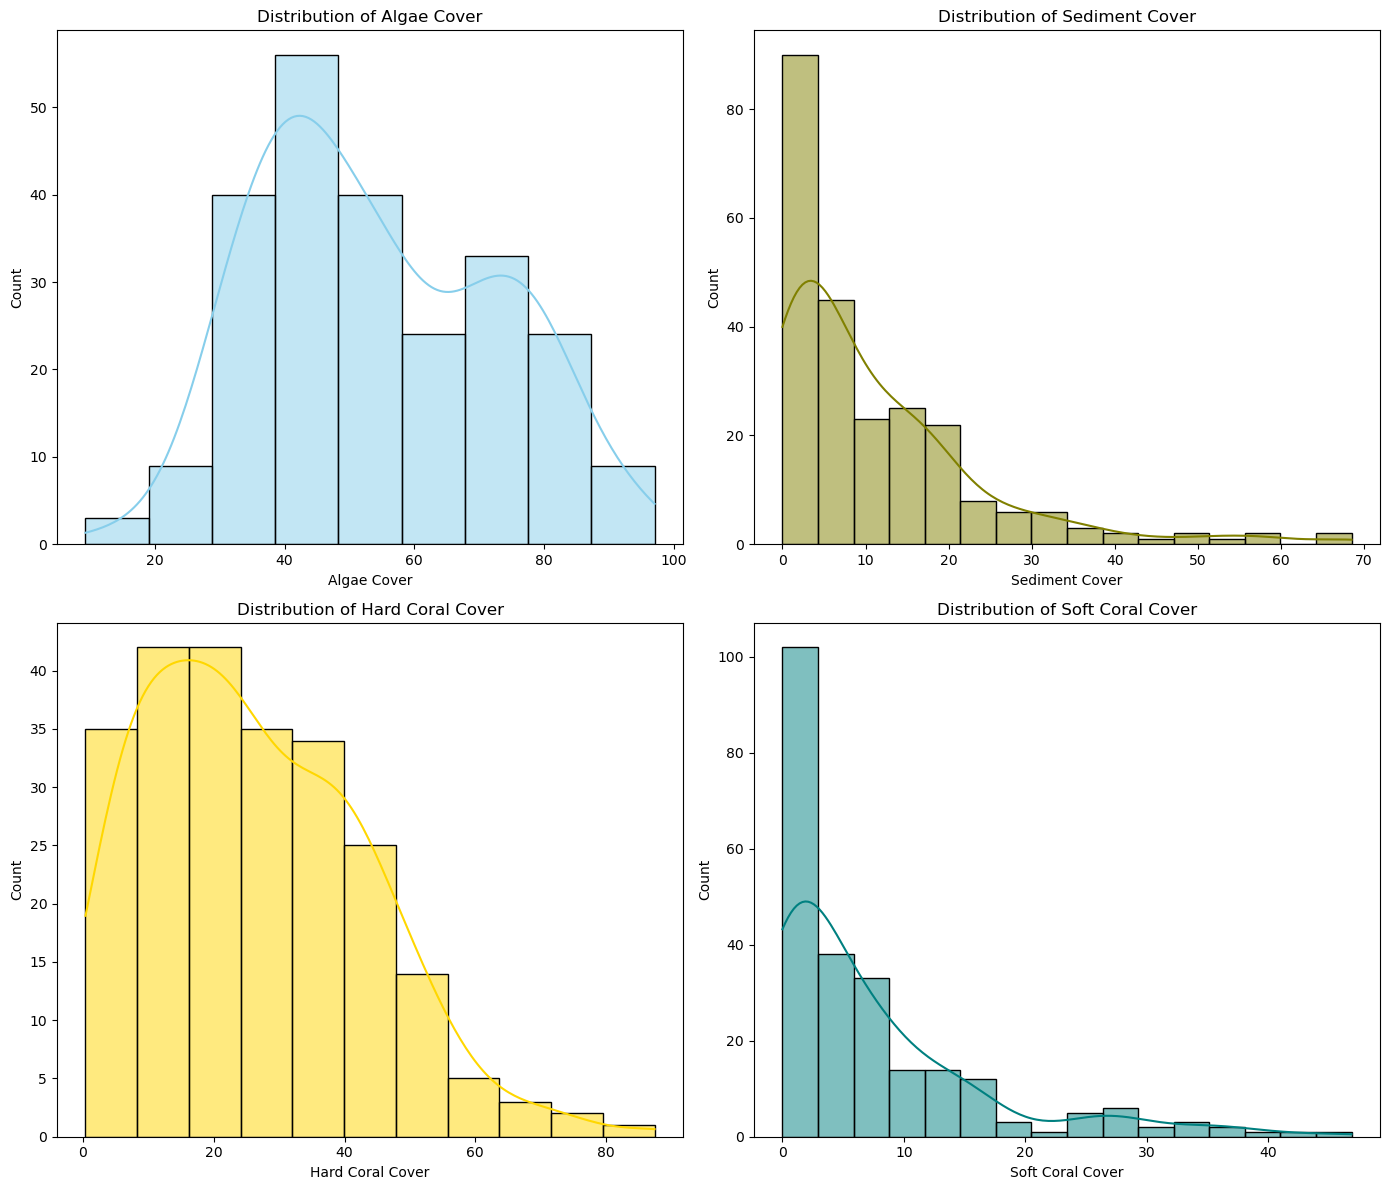

In [3]:
# Create a figure with 2 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot the distribution of algae_cover on the first subplot
sns.histplot(df['algae_cover'], ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Distribution of Algae Cover')
axes[0, 0].set_xlabel('Algae Cover')

# Plot the distribution of sediment_cover on the second subplot
sns.histplot(df['sediment_cover'], ax=axes[0, 1], color='olive', kde=True)
axes[0, 1].set_title('Distribution of Sediment Cover')
axes[0, 1].set_xlabel('Sediment Cover')

# Plot the distribution of hard_coral_cover on the third subplot
sns.histplot(df['hard_coral_cover'], ax=axes[1, 0], color='gold', kde=True)
axes[1, 0].set_title('Distribution of Hard Coral Cover')
axes[1, 0].set_xlabel('Hard Coral Cover')

# Plot the distribution of soft_coral_cover on the fourth subplot
sns.histplot(df['soft_coral_cover'], ax=axes[1, 1], color='teal', kde=True)
axes[1, 1].set_title('Distribution of Soft Coral Cover')
axes[1, 1].set_xlabel('Soft Coral Cover')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

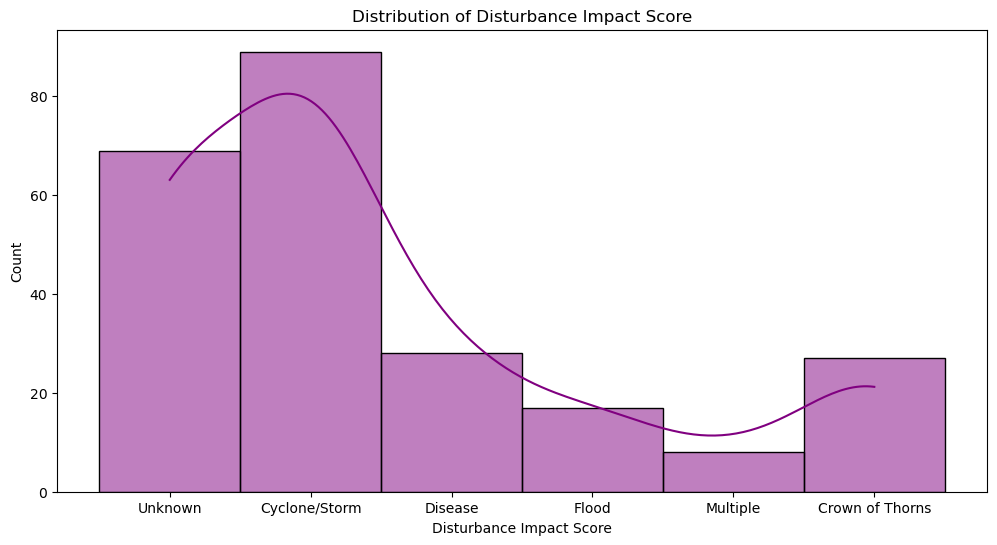

In [4]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plot the distribution of disturbance_impact_score
sns.histplot(df['disturbance_impact_score'], color='purple', kde=True)
plt.title('Distribution of Disturbance Impact Score')
plt.xlabel('Disturbance Impact Score')

# Display the plot
plt.show()

---
### Correlation Analysis
A correlation heatmap is created to visualize the relationships between continuous features, helping identify strong correlations.

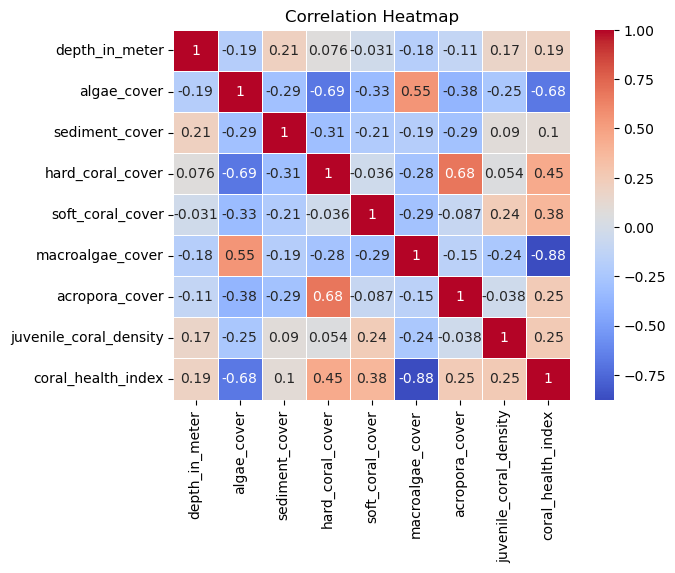

In [5]:
# Correlation Heatmap
corr = df[['depth_in_meter', 'algae_cover', 'sediment_cover', 'hard_coral_cover', 'soft_coral_cover', 'macroalgae_cover', 'acropora_cover', 'juvenile_coral_density', 'coral_health_index']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

---
### Hard Coral Cover vs Soft Coral Cover
A scatter plot is created to analyze the relationship between hard_coral_cover and soft_coral_cover.

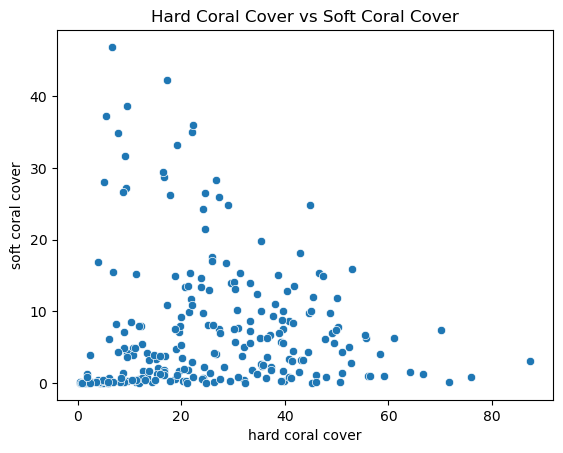

In [6]:
# Plot the relationship between hard_coral_cover and soft_coral_cover
sns.scatterplot(data=df, x="hard_coral_cover", y="soft_coral_cover")
plt.title('Hard Coral Cover vs Soft Coral Cover')
plt.xlabel('hard coral cover')
plt.ylabel('soft coral cover')

# Display the plot
plt.show()

---
### Coral Health Index vs Disturbance Impact Score
A scatter plot is created to analyze the relationship between coral_health_index and disturbance_impact_score.

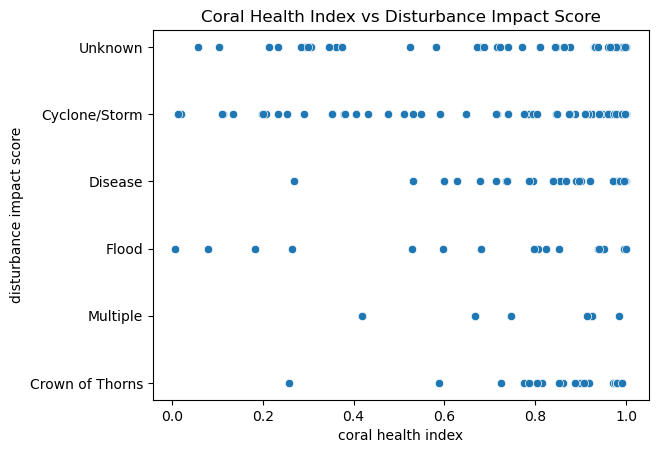

In [7]:
# Plot the relationship between coral_health_index and disturbance_impact_score
sns.scatterplot(data=df, x="coral_health_index", y="disturbance_impact_score")
plt.title('Coral Health Index vs Disturbance Impact Score')
plt.xlabel('coral health index')
plt.ylabel('disturbance impact score')

# Display the plot
plt.show()

---
### Coral Health Index by Region
A box plot is created to visualize the distribution of coral_health_index across different regions.
* The x-axis represents different regions.
* The y-axis represents the coral health index.
* Each box represents the IQR for the coral health index in each region (i.e., the middle 50% of observations).
* The line in the middle of each box represents the median coral health index in each region.
* The whiskers represent the range for the coral health index in each region, excluding outliers.
* Any points beyond the whiskers represent outliers in the coral health index for each region.

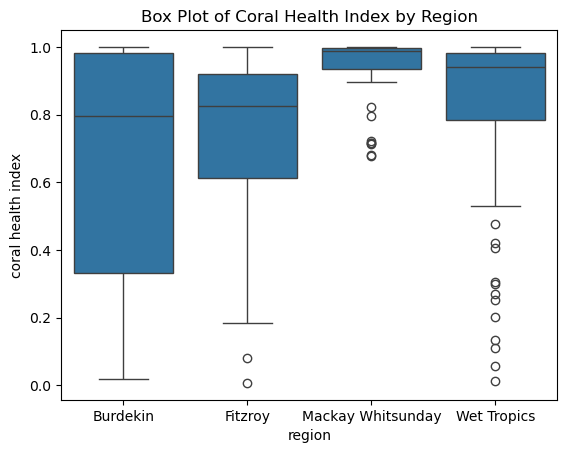

In [8]:
# Plot the box plot of hard_coral_cover by region
sns.boxplot(data=df, x="region", y="coral_health_index")
plt.title('Box Plot of Coral Health Index by Region')
plt.ylabel('coral health index')

# Display the plot
plt.show()

---
### Coral Health Index by Season
A box plot is created to visualize the distribution of coral_health_index across different seasons.
* The x-axis represents different seasons.
* The y-axis represents the coral health index.
* Each box represents the IQR for the coral health index in each season (i.e., the middle 50% of observations).
* The line in the middle of each box represents the median coral health index in each season.
* The whiskers represent the range for the coral health index in each season, excluding outliers.
* Any points beyond the whiskers represent outliers in the coral health index for each season.

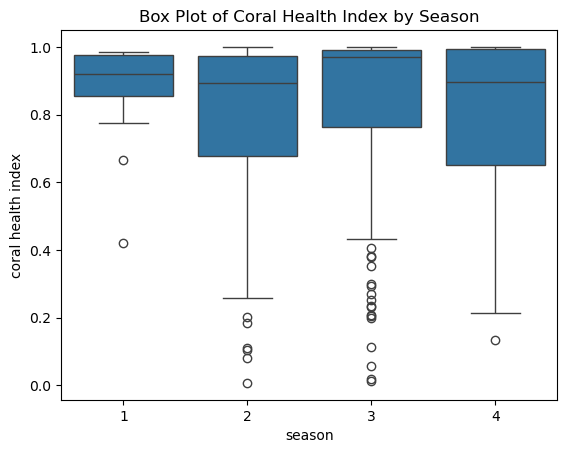

In [9]:
# Plot the box plot of coral_health_index by season
sns.boxplot(data=df, x="season", y="coral_health_index")
plt.title('Box Plot of Coral Health Index by Season')
plt.ylabel('coral health index')

# Display the plot
plt.show()